In [2]:
# numerical and scientific computing libraries
import numpy as np
import scipy as sp

# plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# create a random matrix of size n x m with the rank k <= min(n, m).
def create_random_matrix(n: int, m: int, k: int) -> np.ndarray:
    if k > min(n, m):
        raise ValueError("k must be less than or equal to min(n, m)")
    A = np.random.randn(n, k)
    B = np.random.randn(k, m)
    return A@B

In [4]:
# perform LU decomposition on a random matrix of rank k <= min(n, m).
# check that the product of L and U is equal to the original matrix.
# check that the rank of L and U is equal to k.
def test_lu_decomposition(n: int, m: int, k: int):
    A = create_random_matrix(n, m, k)
    
    Q, L, U = sp.linalg.lu(A)

    error = np.linalg.norm(A - Q@L@U)
    rank_l = np.linalg.matrix_rank(L)
    rank_u = np.linalg.matrix_rank(U)

    assert rank_u == k, f"Rank of U is not equal to {k} ({rank_u})"
    # check whether error is small enough using the machine epsilon
    assert error <= n * m * np.finfo(float).eps, f"Error is too large ({error})"

    return A, Q, L, U, error

In [ ]:
n=20
m=10
k=5
n_repeats = 10

# test LU decomposition with n, m and k for n_repeats times.
# collect LU decomposition errors and the ranks of U.
errors = []
ranks = []

for i in range(n_repeats):
    a, p, l, u, error = test_lu_decomposition(n, m, k)
    errors.append(error)
    ranks.append(np.linalg.matrix_rank(u))

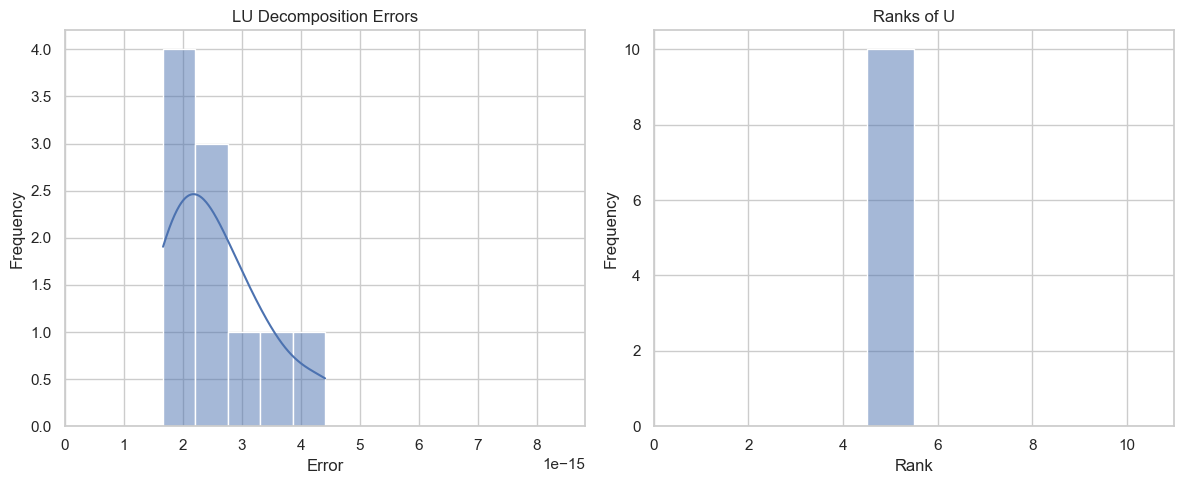

In [6]:
# plot the LU decomposition errors and the ranks of U as histograms.
# make the histogram visually pleasing.
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(errors, kde=True, ax=axs[0])
axs[0].set_title("LU Decomposition Errors")
axs[0].set_xlabel("Error")
axs[0].set_ylabel("Frequency")
axs[0].set_xlim([0, np.max(errors) * 2.])

sns.histplot(ranks, kde=True, ax=axs[1])
axs[1].set_title("Ranks of U")
axs[1].set_xlabel("Rank")
axs[1].set_ylabel("Frequency")
axs[1].set_xlim(0, np.max([n, m])+1)
plt.tight_layout()
plt.show()

In [7]:
# print out the final LU decomposition result in a pretty format.
print("Original matrix A:")
print(np.array2string(a, precision=2, suppress_small=True))
print("\nPermutation matrix P:")
print(np.array2string(p, precision=2, suppress_small=True))
print("\nLower triangular matrix L:")
print(np.array2string(l, precision=2, suppress_small=True))
print("\nUpper triangular matrix U:")
print(np.array2string(u, precision=2, suppress_small=True))
print(f"\nLU decomposition error: {error:.3e}")
print(f"Rank of A: {np.linalg.matrix_rank(a)}")
print(f"Rank of L: {np.linalg.matrix_rank(l)}")
print(f"Rank of U: {np.linalg.matrix_rank(u)}")

Original matrix A:
[[ 0.55  0.31  0.5   0.46  5.68 -3.03 -1.59  2.03  2.6  -2.25]
 [ 0.83 -1.87 -0.93  1.33  1.51 -0.4  -0.33 -0.39  1.4  -0.68]
 [-0.91 -0.18 -2.33  1.01  1.13 -0.65 -1.5   1.85 -0.18 -0.53]
 [-0.47  1.5  -0.04 -0.61 -0.24 -0.66 -0.63  0.66  3.21 -1.13]
 [-0.69  0.36  0.39  3.82  2.21 -1.84 -1.12  3.57 -1.07 -4.64]
 [-1.3   0.58  0.24  4.74 -1.7  -0.31 -0.36  3.16 -1.6  -5.18]
 [-1.51 -0.83 -1.83 -0.52 -7.89  4.77  2.   -2.06 -7.97  4.77]
 [-1.35  2.19 -2.31 -5.48  0.86 -0.04 -1.38  0.1  -0.26  5.44]
 [ 1.03  2.4   3.56 -5.56 -2.24  0.99  2.05 -3.74  3.1   3.3 ]
 [ 0.35 -1.39  1.09  1.6  -1.72  1.46  1.51 -0.82 -4.79  0.35]]

Permutation matrix P:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0